In [2]:
# import all necessary packages  
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stat


In [4]:
# Reading all datas 
benin_data = pd.read_csv("../data/benin_clean.csv", parse_dates=['Timestamp'])
sierraleone_data = pd.read_csv("../data/sierraleone_clean.csv", parse_dates=['Timestamp'])
togo_data = pd.read_csv("../data/togo_clean.csv", parse_dates=['Timestamp'])

In [5]:
# Add country labels 
benin_data["Country"] = "Benin"
sierraleone_data["Country"] = "Sierraleone"
togo_data["Country"] = "Togo"

# Combine datasets
df = pd.concat([benin_data, sierraleone_data, togo_data], ignore_index=True)

C:\Users\jonep\AppData\Local\Temp\ipykernel_13136\4286726735.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Country", y=metric, ax=axes[i], palette="Set2")
C:\Users\jonep\AppData\Local\Temp\ipykernel_13136\4286726735.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Country", y=metric, ax=axes[i], palette="Set2")
C:\Users\jonep\AppData\Local\Temp\ipykernel_13136\4286726735.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Country", y=metric, ax=axes[i], palette="Set2")


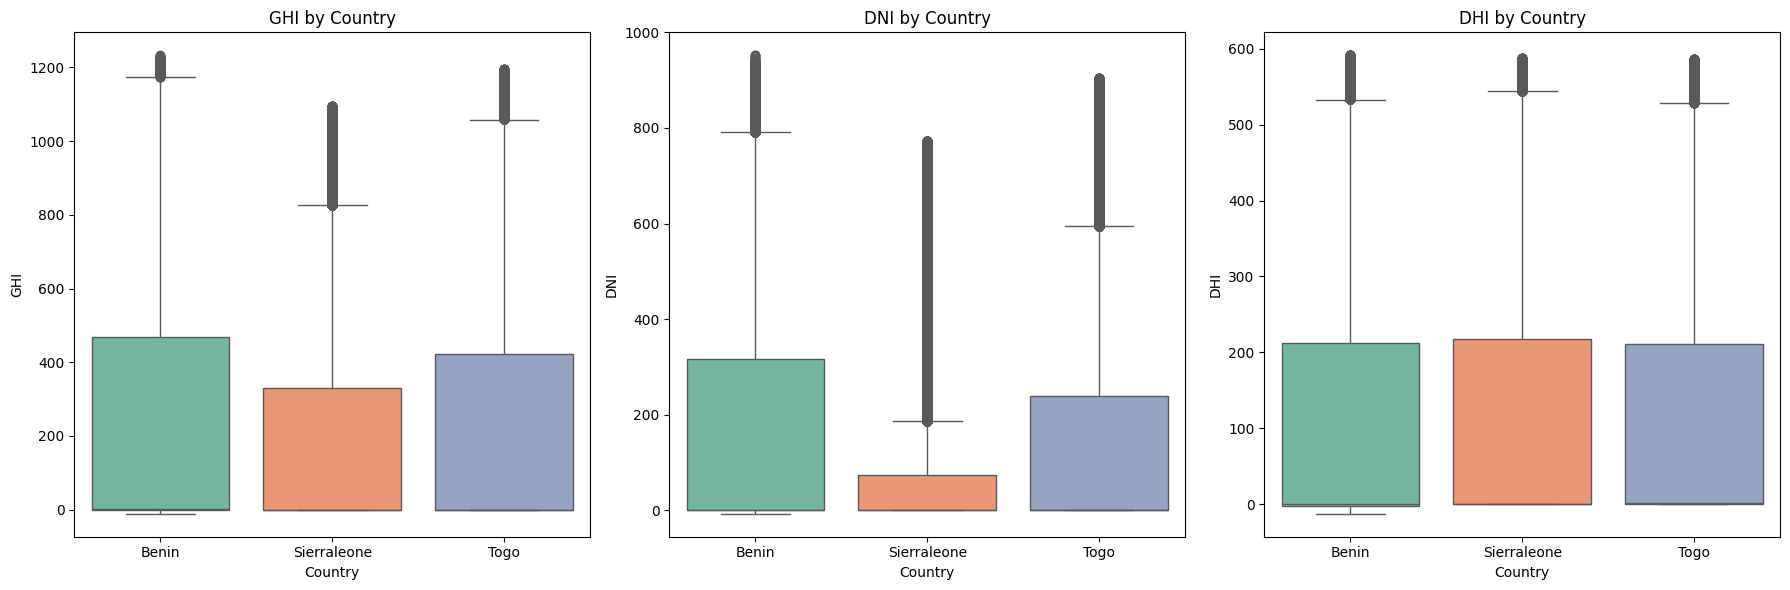

In [6]:
metrics = ['GHI', 'DNI', 'DHI']

# Create boxplots side-by-side
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)
for i, metric in enumerate(metrics):
    sns.boxplot(data=df, x="Country", y=metric, ax=axes[i], palette="Set2")
    axes[i].set_title(f'{metric} by Country')
    axes[i].set_xlabel("Country")
    axes[i].set_ylabel(metric)

plt.tight_layout()
plt.show()

In [7]:
summary = df.groupby("Country")[metrics].agg(['mean', 'median', 'std']).round(2)
print(summary)

                GHI                    DNI                    DHI         \
               mean median     std    mean median     std    mean median   
Country                                                                    
Benin        236.23    0.7  328.29  166.90   -0.1  262.08  111.66    0.5   
Sierraleone  187.21    0.0  277.02  104.21    0.0  200.82  110.50    0.0   
Togo         225.03    0.5  316.45  147.97    0.0  247.68  112.78    1.5   

                     
                std  
Country              
Benin        153.10  
Sierraleone  151.44  
Togo         151.57  


C:\Users\jonep\AppData\Local\Temp\ipykernel_13136\1584710677.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ghi.values, y=avg_ghi.index, palette="viridis")


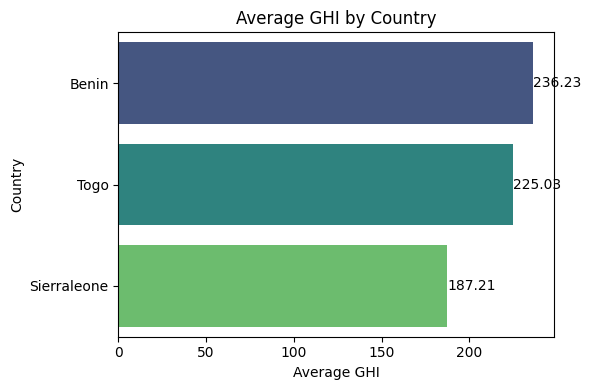

In [8]:
# Compute average GHI per country
avg_ghi = df.groupby("Country")["GHI"].mean().sort_values(ascending=False).round(2)

# Create barplot
plt.figure(figsize=(6, 4))
sns.barplot(x=avg_ghi.values, y=avg_ghi.index, palette="viridis")

# Add data labels
for index, value in enumerate(avg_ghi.values):
    plt.text(value + 0.1, index, str(value), va='center')

plt.title("Average GHI by Country")
plt.xlabel("Average GHI")
plt.ylabel("Country")
plt.tight_layout()
plt.show()